In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import pycountry_convert as pc



In [2]:
# Study data files
outputfile = "raw/covid_countries.csv"
gdpoutputfile = "resources/gdp_3y_data.csv"
# Read COVID data and the study results
covid_data= pd.read_csv(outputfile)
# Read GDP  data and the study results
gdp_data = pd.read_csv(gdpoutputfile)
#Add additional Columns and compute
covid_data["continent"]=""
covid_data["Country Code"]=""
#covid_data["deadpercentage"]=""
#covid_data["recoverypercentage"]=""
#Calculate Death/Recovery percentages
#covid_data["deadpercentage"]=covid_data["dead"]/covid_data["confirmed"]*100
#covid_data["recoverypercentage"]=covid_data["recovered"]/covid_data["confirmed"]*100
#convert country_code 2 digit into UPPER case
covid_data["country_code"]=  covid_data["country_code"].str.upper()
#covid_data.head(100)

In [3]:
#Determine continent for a given country 
for index, row in covid_data.iterrows():
    try:
        # Deriving continent code based on "2 digit country code"
        continent_code = pc.country_alpha2_to_continent_code(row["country_code"].upper())
        # convert c "2 digit country code" to "3 digit country code"
        covid_data.loc[index,"Country Code"] = pc.country_name_to_country_alpha3(row["location"])
       
        #print(continent_code)
        covid_data.loc[index, "continent"] = continent_code
    except(KeyError, IndexError):
        print("Unable to determine continent code")
covid_data.replace('', np.nan, inplace=True)
covid_data["continent"].fillna("OTH", inplace = True)
covid_group = covid_data.groupby(['continent']).sum()
# Merge two files and add GDP information .
covid_data.rename(columns = {'location':'Country Name'}, inplace = True)
gdp_data.head()


Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code
Unable to determine continent code


,Unnamed: 0,Country Name,Country Code,2017,2018,2019,Average GDP
0,1,Afghanistan,AFG,1.886995e+10,1.835388e+10,1.929110e+10,1.883831e+10
1,2,Angola,AGO,1.221238e+11,1.013532e+11,8.881570e+10,1.040976e+11
2,3,Albania,ALB,1.301969e+10,1.514702e+10,1.527918e+10,1.448197e+10
3,4,Andorra,AND,3.000181e+09,3.218316e+09,3.154058e+09,3.124185e+09
4,5,Arab World,ARB,2.516121e+12,2.771384e+12,2.817415e+12,2.701640e+12


In [4]:
#Add Two digit country code to GDP data.
gdp_data["country_code"]=""
#Determine continent for a given country 
for index, row in gdp_data.iterrows():
    try:
        # Deriving continent code based on "2 digit country code"
        country_code2 = pc.country_alpha3_to_country_alpha2(row["Country Code"])
        # convert c "2 digit country code" to "3 digit country code"
        gdp_data.loc[index,"country_code"] = country_code2
               
    except(KeyError, IndexError):
        print("Unable to determine country code 2")
# Identify missing country code2 data in gdp_data SET
gdp_data_nobk = gdp_data.loc[gdp_data["country_code"] != '']
# Import /Convert and Merge ["maintain one country code from GDP data and to have 2 digit country code"]
# Combine the data into a single dataset.  
covid_gdp_data= pd.merge(covid_data[["Country Name", "country_code", "latitude","longitude","confirmed", "dead", "recovered", "continent"]] , 
                         gdp_data_nobk[["country_code", "2017", "2018", "2019", "Average GDP"]], 
                         how="left", on=["country_code", "country_code"]
                        )


Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine country code 2
Unable to determine 

In [5]:
# Drop all blank data to come up with CLEAN Data and we can use it for futher analysis
covid_gdp_data.dropna(inplace=True)
# Is there any relation between number of deaths to the GDP of a country...
# Heat Map on Covid Data /with Lat & Long
# Bar Plot - Continent wise [ Confirmed, Dead &  Recovered ] or Pi Chart  
# Scatter plot... for Correlation analysis 
# Are there any outliers we need to omit ?
# do we need BOX plot ?
# What T test ? Do we need this (low GPD and High GDP) [ Independent varibale .. to be categorical - GDP - continuous Data]
# 


In [6]:
covid_gdp_data.head(181)

,Country Name,country_code,latitude,longitude,confirmed,dead,recovered,continent,2017,2018,2019,Average GDP
0,Mexico,MX,23.634501,-102.552784,2175462,195908,1720430,NA,1.158913e+12,1.222349e+12,1.268871e+12,1.216711e+12
1,Poland,PL,51.919438,19.145136,1984248,48388,1603832,EU,5.265089e+11,5.874117e+11,5.958582e+11,5.699263e+11
2,Peru,PE,-9.189967,-75.015152,1443521,49706,1355792,SA,2.110072e+11,2.220450e+11,2.268481e+11,2.199667e+11
3,Netherlands,NL,52.132633,5.291266,1179612,16198,0,EU,8.338696e+11,9.140434e+11,9.070509e+11,8.849880e+11
5,Chile,CL,-35.675147,-71.542969,911469,21988,854827,SA,2.770450e+11,2.982580e+11,2.823182e+11,2.858737e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
223,Sweden,SE,60.128161,18.643501,738537,13236,0,EU,5.410187e+11,5.554554e+11,5.308839e+11,5.424527e+11
224,Denmark,DK,56.263920,9.501785,223415,2397,211962,EU,3.321211e+11,3.568795e+11,3.501043e+11,3.463683e+11
225,Turks and Caicos,TC,21.694025,-71.797928,2253,15,2109,NA,1.022365e+09,1.113178e+09,1.197415e+09,1.110986e+09
228,Norway,NO,60.472024,8.468946,84553,648,70224,EU,3.983940e+11,4.341666e+11,4.033364e+11,4.119656e+11


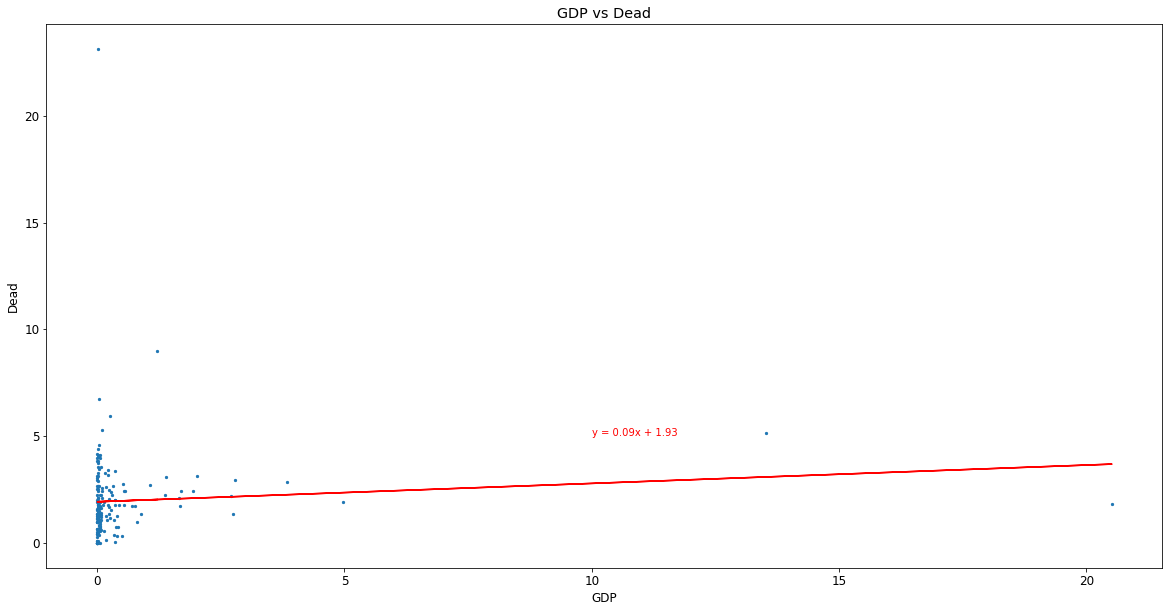

In [36]:
# Generate a scatter plot for G GDP vs Confirmed/Deaths (%)

# This logic calculates correlation between GDP and Recovery

x1 = covid_gdp_data['Average GDP']/1000000000000
y1 = covid_gdp_data['dead']/covid_gdp_data['confirmed']*100

# This logic calculates Linear Regression and returns slope/intercept, rvalue, pvalue, std error 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x = covid_gdp_data['Average GDP']/1000000000000, y = covid_gdp_data['dead']/covid_gdp_data['confirmed']*100, s = 5)

plt.plot(x1,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=10,color="red")

# Add labels and title to plot

plt.xlabel("GDP")
plt.ylabel("Dead")
plt.title('GDP vs Dead')
#plt.show()
plt.rcParams.update({"font.size":12})
plt.savefig("GDP_Dead.png", pad_inches = 0.1, bbox_inches = "tight")

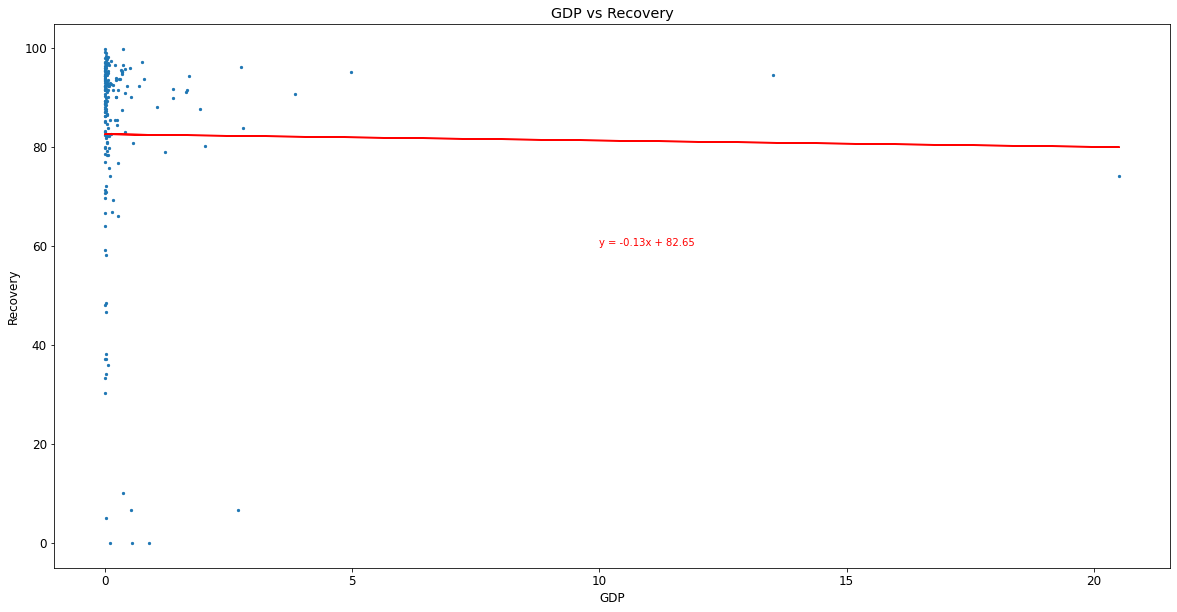

In [39]:
# This logic calculates correlation between GDP and Recovery

x1 = covid_gdp_data['Average GDP']/1000000000000
y1 = covid_gdp_data['recovered']/covid_gdp_data['confirmed']*100

# This logic calculates Linear Regression and returns slope/intercept, rvalue, pvalue, std error 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x = covid_gdp_data['Average GDP']/1000000000000, y = covid_gdp_data['recovered']/covid_gdp_data['confirmed']*100, s = 5)

plt.plot(x1,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=10,color="red")

# Add labels and title to plot

plt.xlabel("GDP")
plt.ylabel("Recovery")
plt.title('GDP vs Recovery')
#plt.show()
plt.rcParams.update({"font.size":12})
plt.savefig("GDP_Recovery.png", pad_inches = 0.1, bbox_inches = "tight")

In [10]:
# Output dataframe to csv
covid_gdp_data.to_csv("Resources/covid_gdp_test.csv")